# Azted G-dDT Test Run

In [2]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sim_df = pd.read_pickle('s3://aztec-gddt/psuu_run_2024-04-12T024641Z/timestep_tensor_0.pkl.zip')

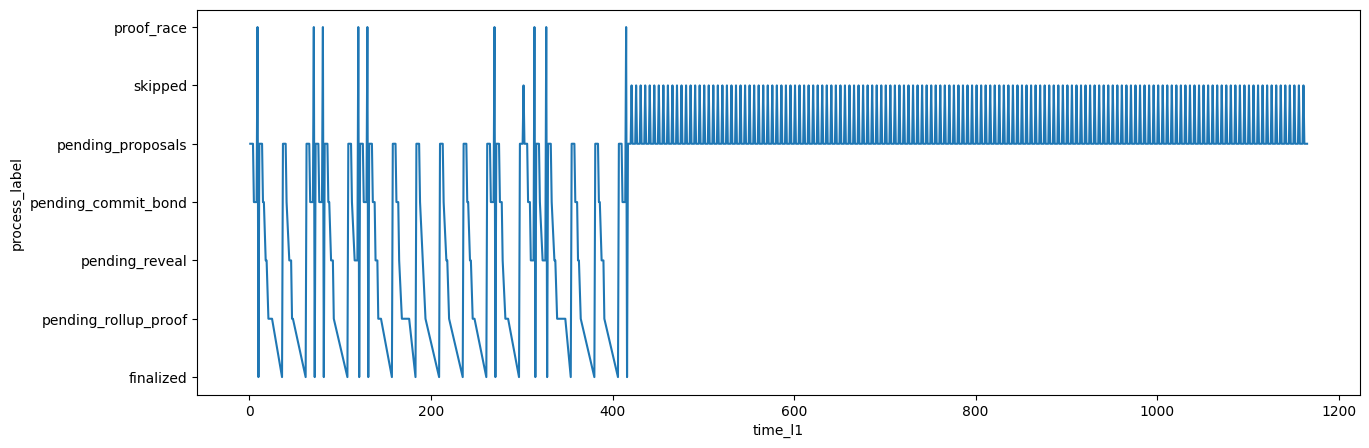

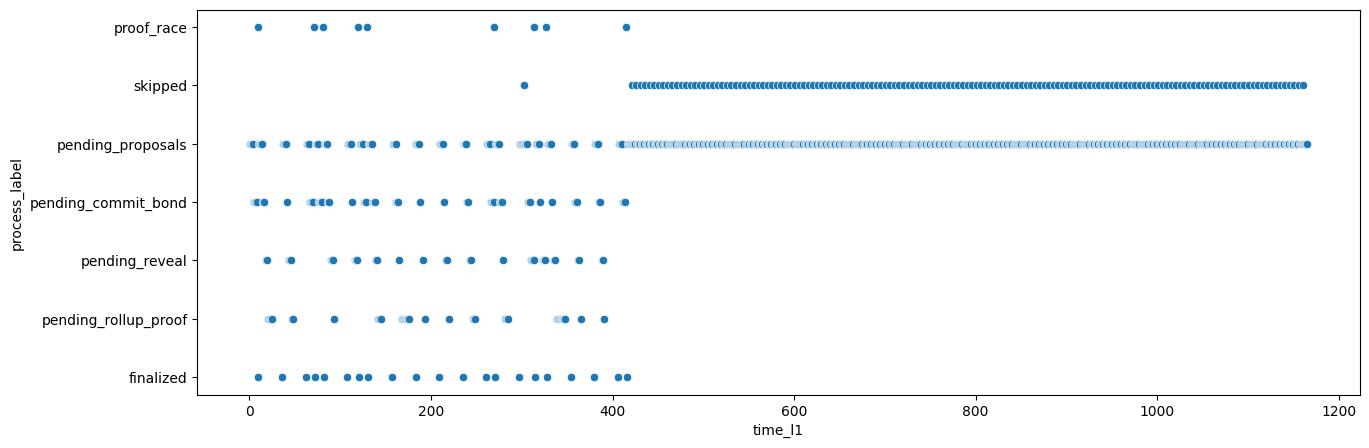

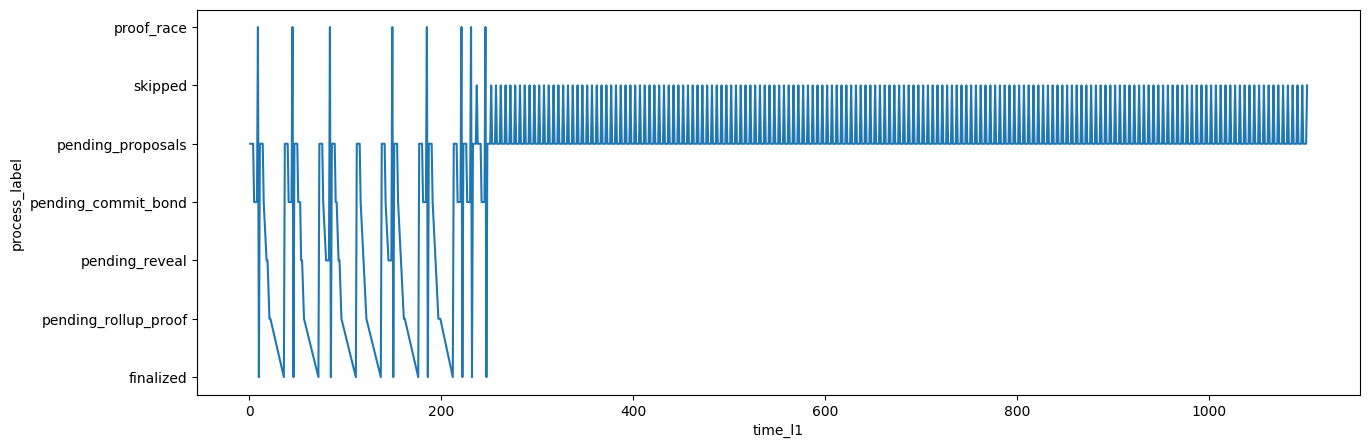

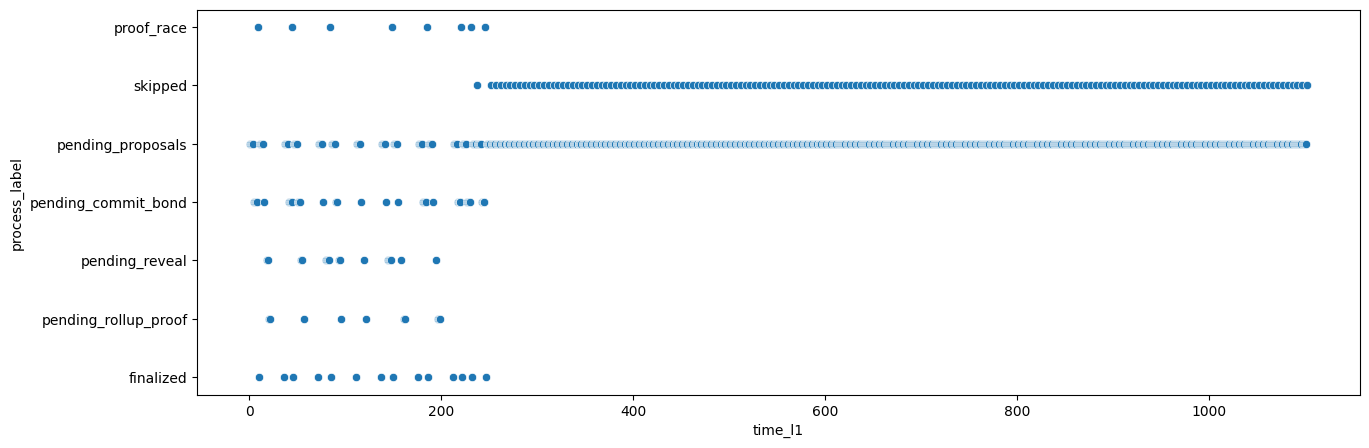

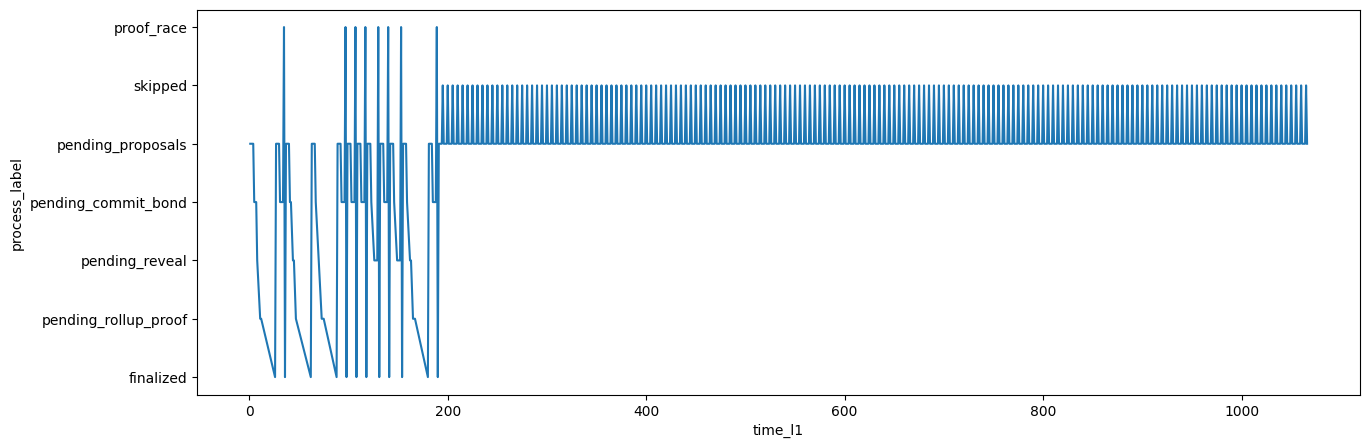

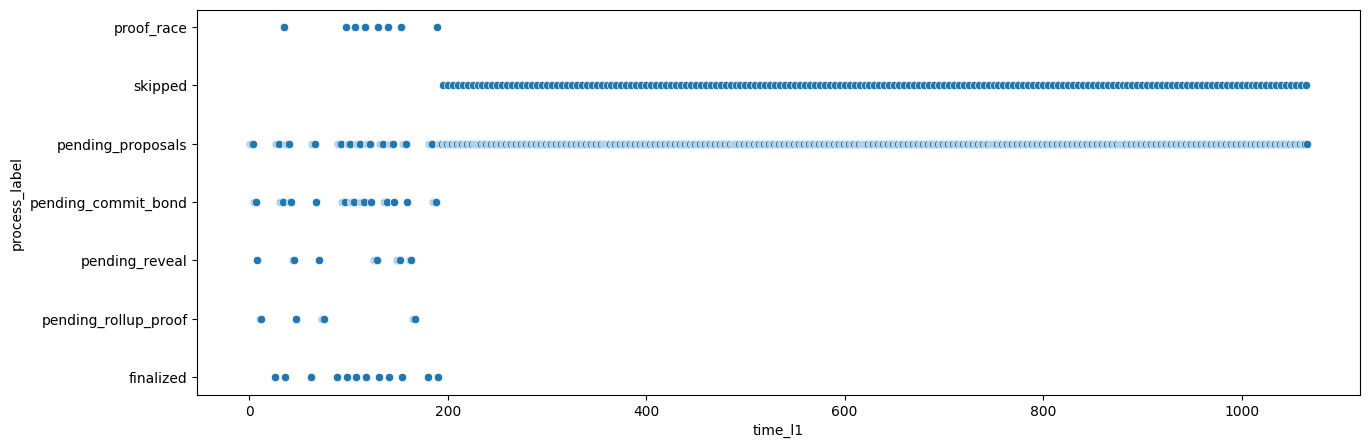

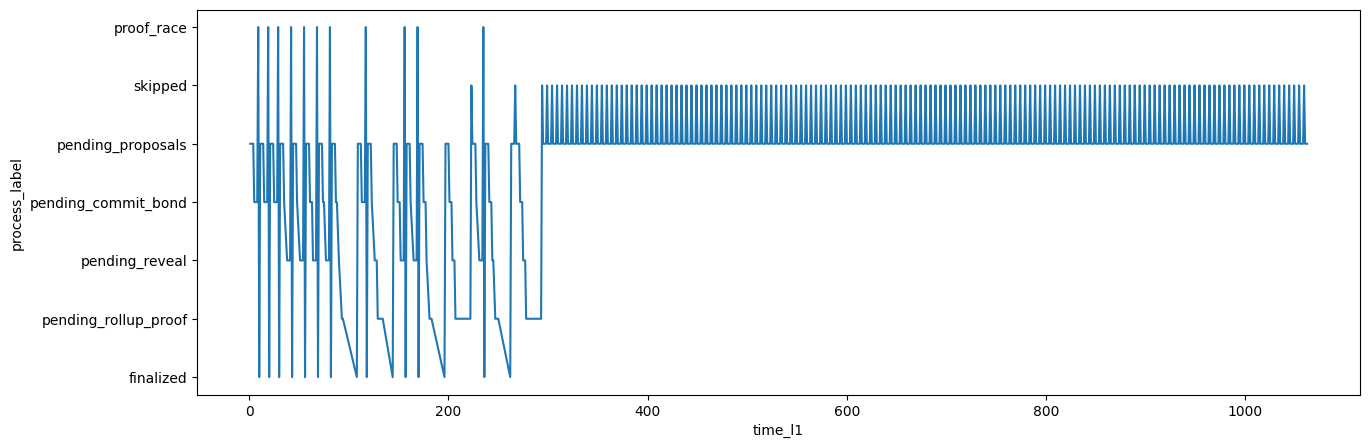

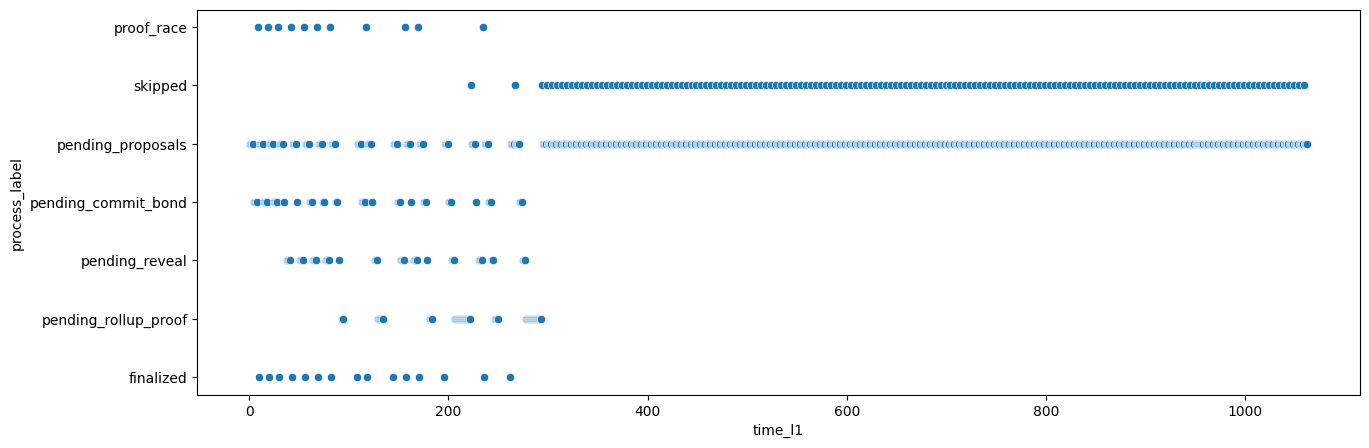

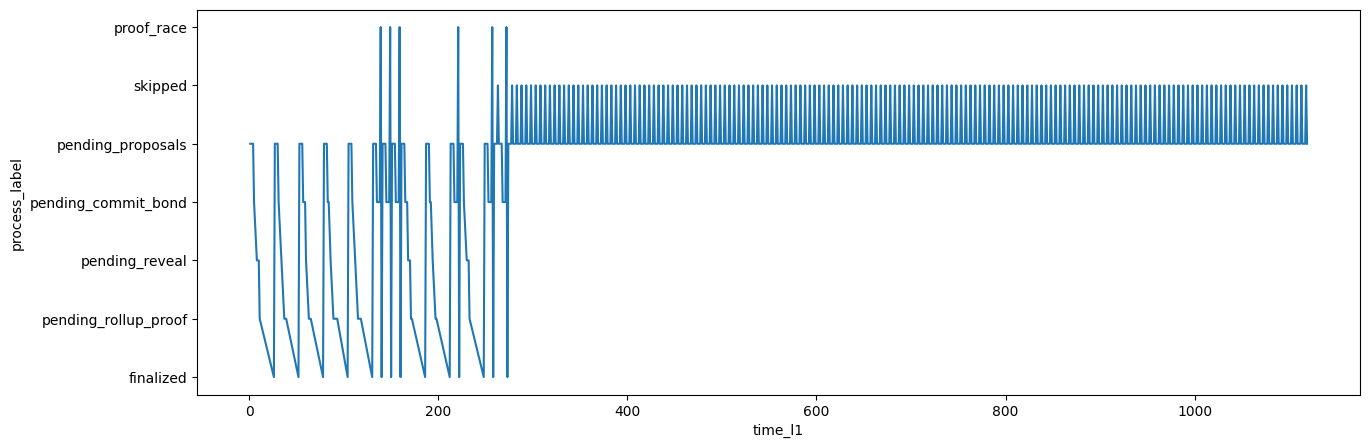

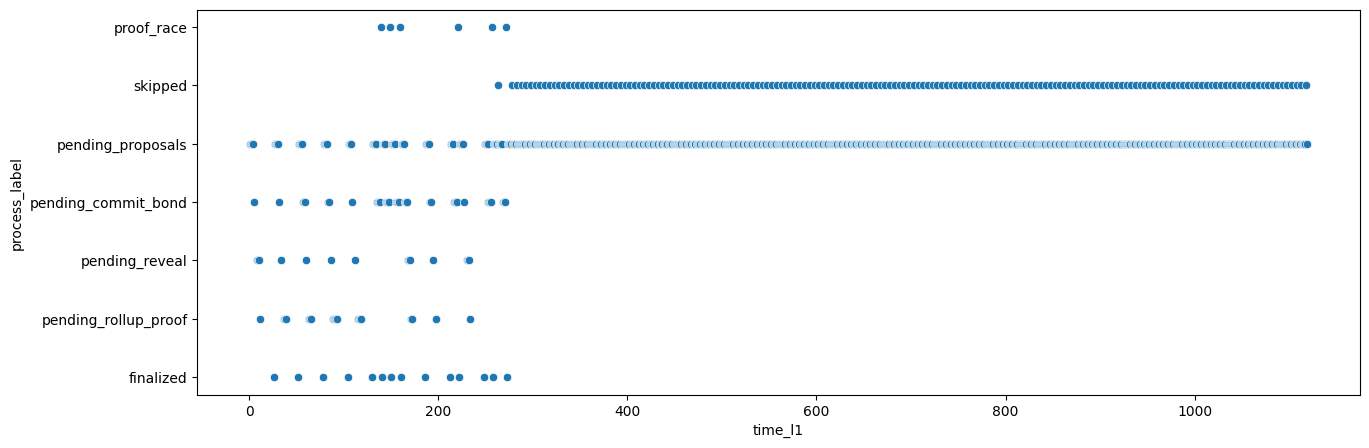

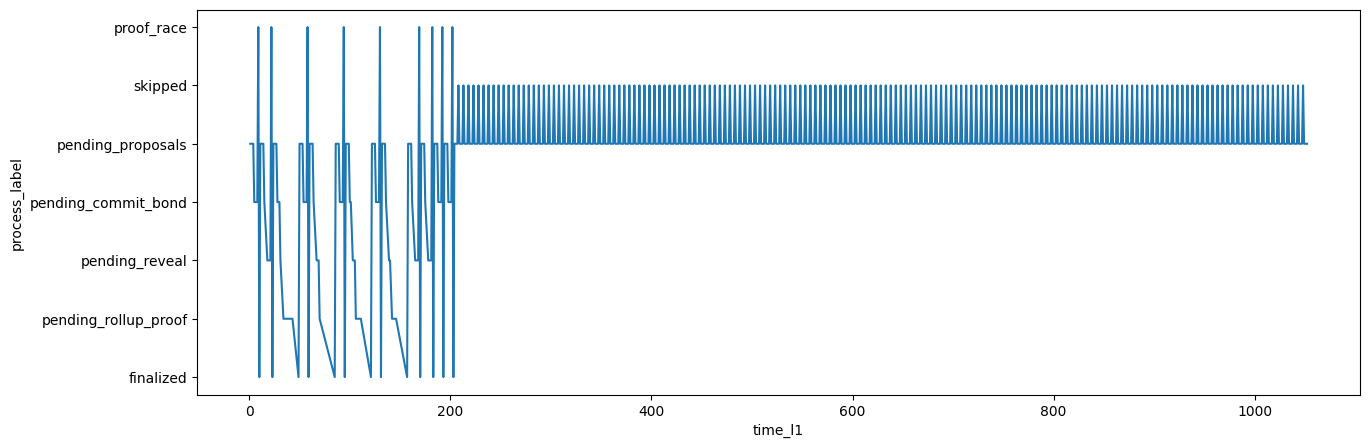

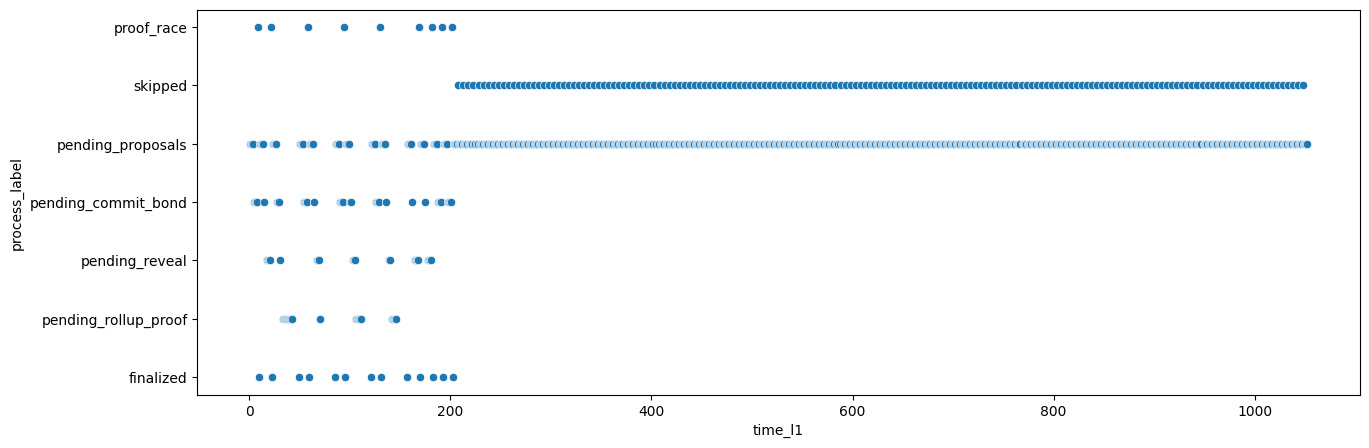

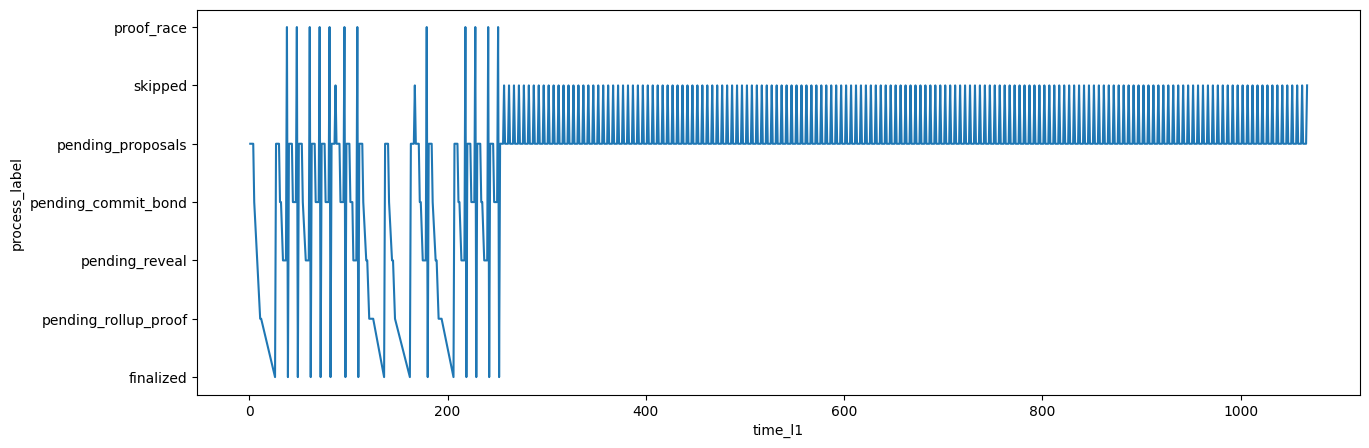

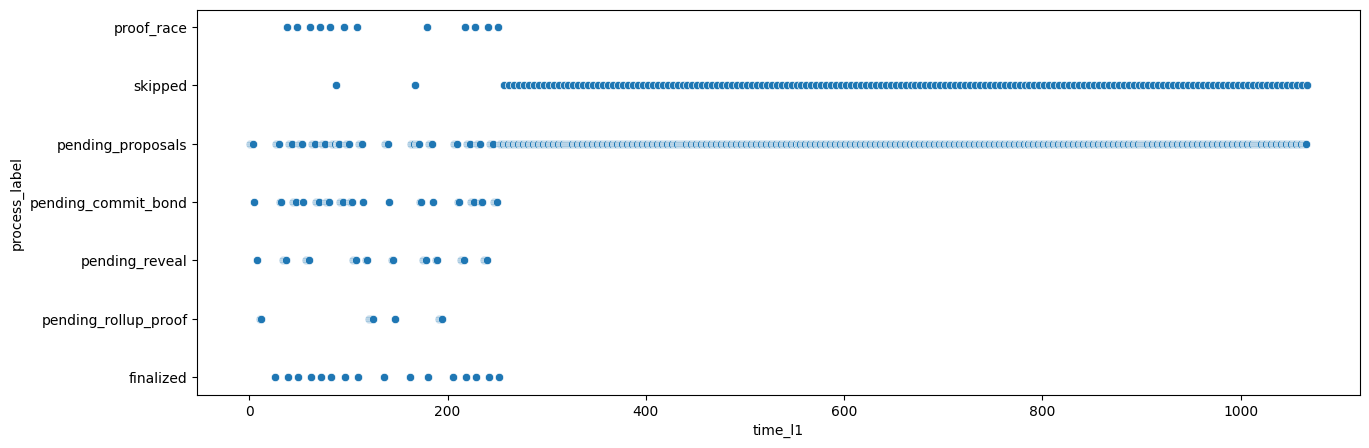

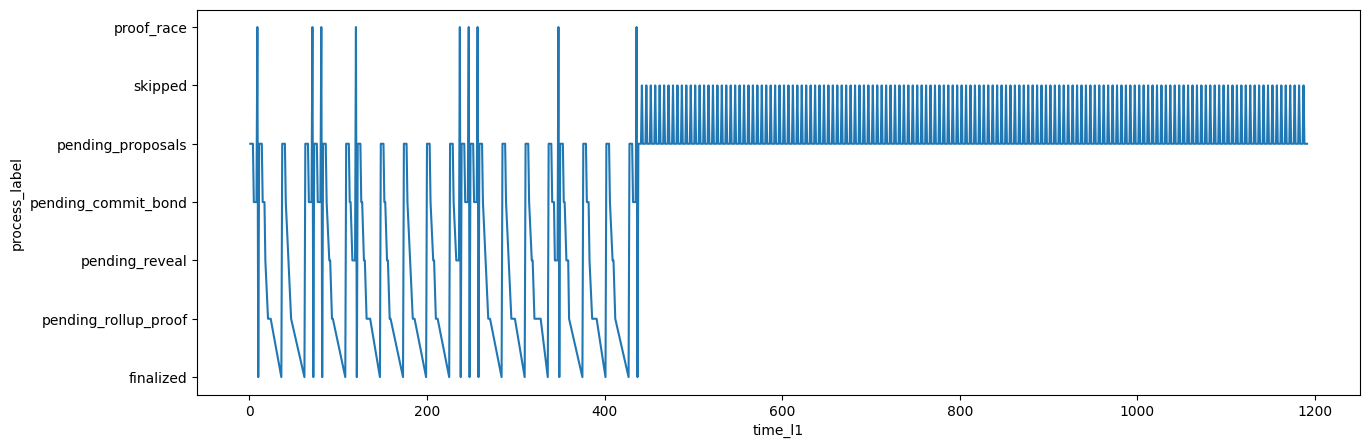

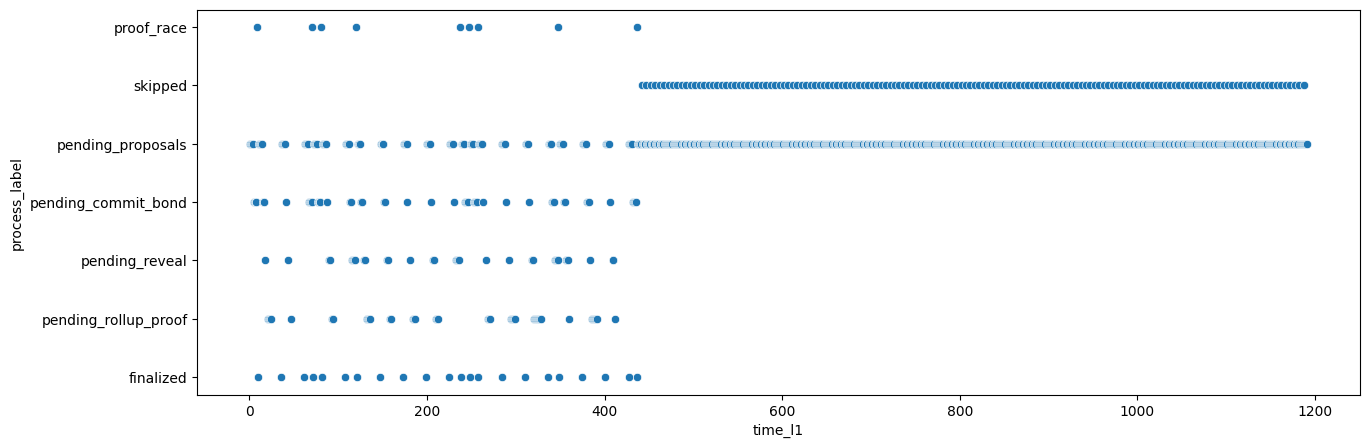

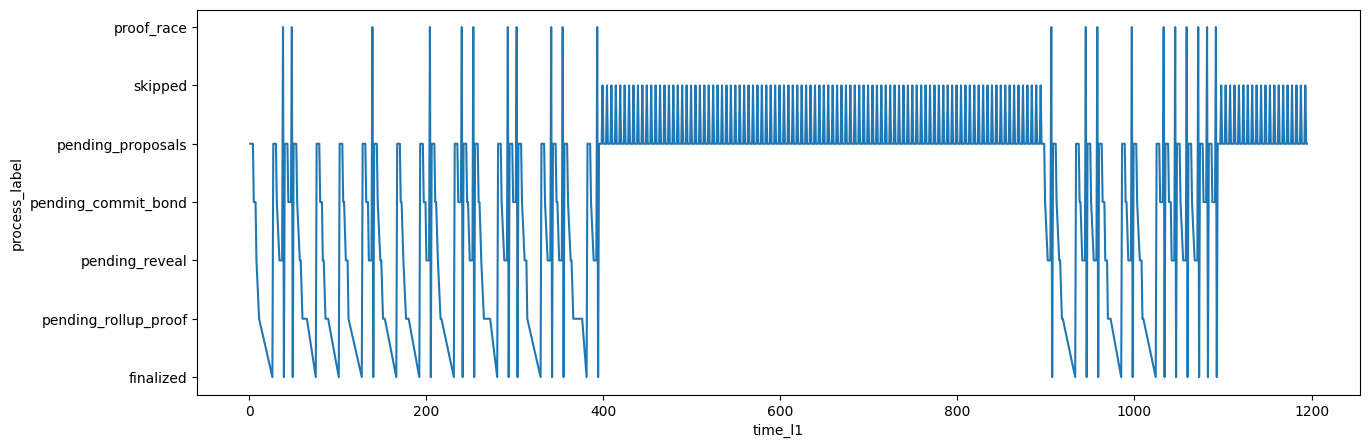

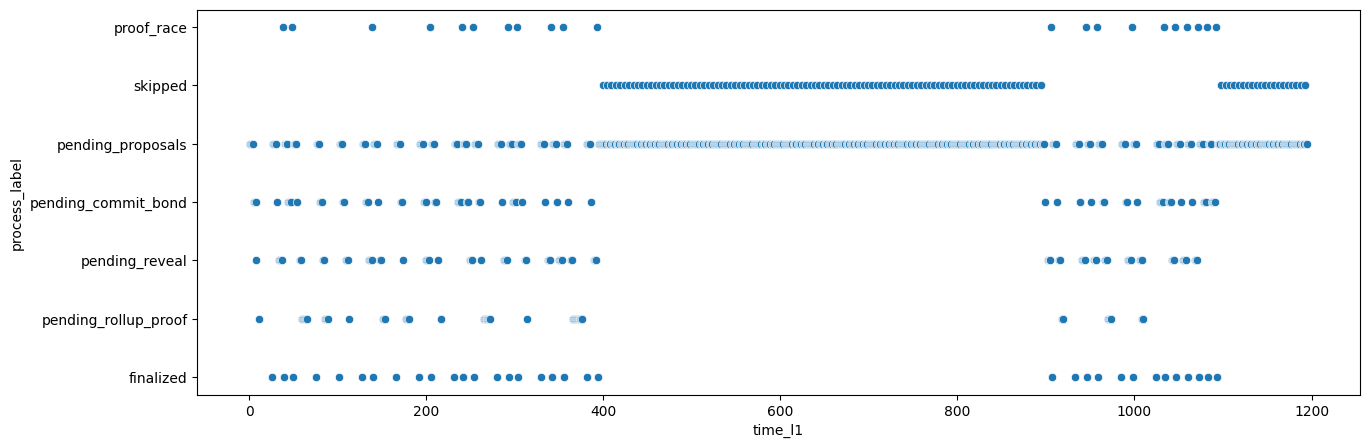

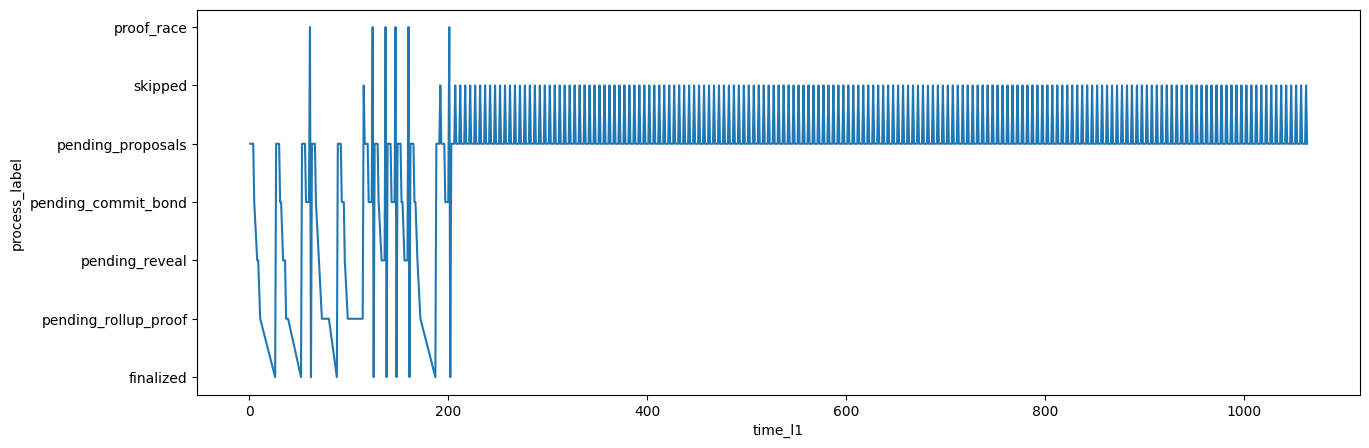

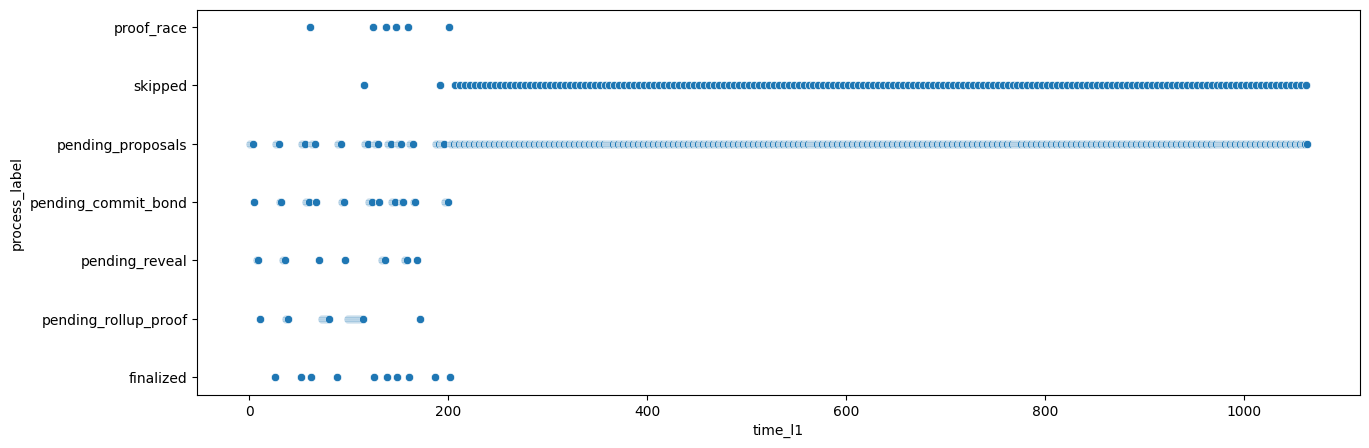

In [6]:
for i in range(10):
    traj_df = sim_df.query(f"subset == {i} & run == 1")

    fig_df = traj_df.copy()
    fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
    fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
    fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


    plt.figure(figsize=(15, 5))
    sns.lineplot(x=fig_df.time_l1, 
                y=fig_df.process_label)

    plt.figure(figsize=(15, 5))
    sns.scatterplot(x=fig_df.time_l1, 
                y=fig_df.process_label)
    plt.show()